A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

#A

In [262]:
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.integrate import quad
from sympy import Symbol, sqrt, sin, pi

In [263]:
data = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")
data

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


In [264]:
# Preparar curva, hacer fit y derivar para hallar la velocidad y aceleración.
def curve(x, a, b, c):
  return a*x**2 + b*x + c

l, le = optimize.curve_fit(curve, data["hours"], data["followers"], p0=[0.1, 10, 50000])
a, b, c = l

p = np.poly1d([a, b, c])
ve = p.deriv()
ac = v.deriv()
tmax = ve.roots[0]
t = np.linspace(0, tmax)


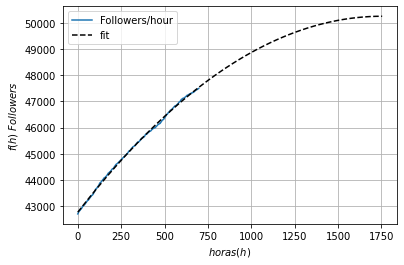

In [265]:
# Grafica y fit

plt.plot(data["hours"], data["followers"], label="Followers/hour")
plt.plot(t, curve(t, a, b, c), linestyle = "--", color="k", label="fit")
plt.xlabel("$horas(h)$", size=10)
plt.ylabel("$f(h)$" + " " + "$Followers$")
plt.legend()
plt.grid()
plt.show()

1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

In [266]:
print("1.la velociadad inicial followers/hour es: {} followers/h \n".format(ve(0)))
print("2.La aceleración constante en followers/hour**2 es: {} followers/h**2 \n".format(ac))
print("3.El número máximo de seguidores que alcanzaría el perfil: {} followers \n".format(p(tmax)))
print("4.La fecha en la que se alcanzaría dicho máximo es en {} horas o 73.1 días despues, es decir 2021-08-04 22:06:53.668 + 73.1 días \n".format(tmax))

1.la velociadad inicial followers/hour es: 8.55213777040858 followers/h 

2.La aceleración constante en followers/hour**2 es:  
-0.004875 followers/h**2 

3.El número máximo de seguidores que alcanzaría el perfil: 50262.136794055594 followers 

4.La fecha en la que se alcanzaría dicho máximo es en 1754.193157798696 horas o 73.1 días despues, es decir 2021-08-04 22:06:53.668 + 73.1 días 



#B

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

#1

$T/T_0 = \frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}} \times\frac{1}{T_0} =\frac{2}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}} $

In [267]:
x = Symbol("x")
alpha = Symbol("α")

f = (2/pi)*(1/sqrt(1 - (sin(alpha/2))**2*(sin(x))**2 ) )
Integral(f,(x , 0, pi/2))

Integral(2/(pi*sqrt(-sin(x)**2*sin(α/2)**2 + 1)), (x, 0, pi/2))

In [306]:

integral = lambda a: quad(lambda x: (1/np.sqrt(1 - ((np.sin(a/2))**2) * ((np.sin(x))**2 )) ),0,np.pi/2)[0]

def T_T0(a):
  if 0 <= a and a <= np.pi/2:
    try:
        f=np.vectorize(integral)
    except IndexError:
        f=integral
    return (2/np.pi)*f(a)
  else:
    return "Angulo incorrecto"





#2

In [307]:

ang = np.linspace(0, 90, 91)
rad = np.deg2rad(ang)
T = T_T0(ang[0])
df = pd.DataFrame({'T_Grados':ang, "T_Radianes":rad})
df["T/T0"] = df.T_Radianes.apply(lambda x: T_T0(x))

df


,T_Grados,T_Radianes,T/T0
0,0.0,0.000000,1.000000
1,1.0,0.017453,1.000019
2,2.0,0.034907,1.000076
3,3.0,0.052360,1.000171
4,4.0,0.069813,1.000305
...,...,...,...
86,86.0,1.500983,1.162214
87,87.0,1.518436,1.166617
88,88.0,1.535890,1.171105
89,89.0,1.553343,1.175679


#3


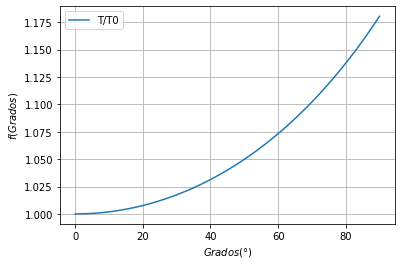

In [308]:
plt.plot(df["T_Grados"], df["T/T0"], label="T/T0")
plt.xlabel("$Grados(°)$", size=10)
plt.ylabel("$f(Grados)$")
plt.legend()
plt.grid()
plt.show()

#4
El comportamiento de $\alpha = 0.$  donde $\frac{T}{T0}=1$, es debido a que en  $\alpha = 0$ se da que $T$ tiende a $T_0$ es decir $T = T_0$ en $\alpha = 0.$ 

Demostración integral:

$T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}$

$T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} d \phi $ para $\alpha=0 \\$

$T=\frac{2 T_{0}}{\pi} (\frac{\pi}{2})$

$T=T_0$
